# Supervised Learning: Linear Regression

What is Linear Regression?
Wiki: https://en.wikipedia.org/wiki/Linear_regression

### Step 1: Getting and setting up the data

In [3]:
# Data analysis imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Scikit learn imports
from sklearn import datasets

C:\Users\Mehul\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
# Load the scikit learn's boston housing datasets
boston = datasets.load_boston()

In [6]:
# Look at the meta data of the boston housing dataset
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Step 2: Visualizing the data

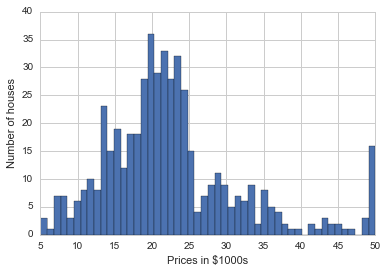

In [7]:
# Histogram of prices ( this is the target of our dataset)
plt.hist(boston.target, bins=50)

#label
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

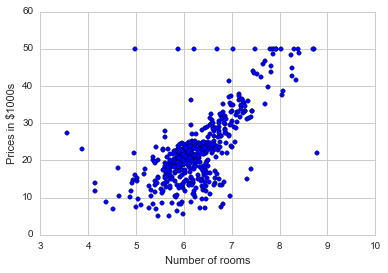

In [11]:
# Scatter plot of number of rooms versus the housing price 
plt.scatter(boston.data[:,5],boston.target)

#label
plt.xlabel('Number of rooms')
plt.ylabel('Prices in $1000s')

Prices increases as the number of room increases

In [12]:
# Reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# label column
boston_df.columns = boston.feature_names

# show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [16]:
# Set price column for target variable in the DataFrame
boston_df['Price'] = boston.target

In [17]:
# Show the DataFrame
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


C:\Users\Mehul\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


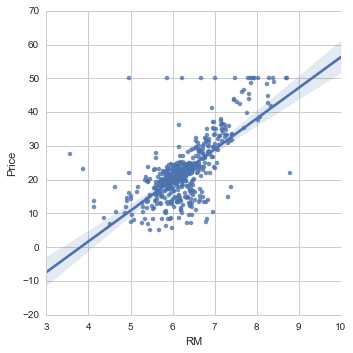

In [18]:
# Using seaborn to create a linear fit
sns.lmplot('RM', 'Price', data=boston_df)

This is good for simple linear regression model. But for more complicated regression analysis we should scikit learn library.

### Step 3: Use NumPy for a Univariate Linear Regression

In [19]:
# Set up X as median room values
X = boston_df.RM

# Use vstack to make X two-dimensional
X = np.vstack(boston_df.RM)

# Set up Y as the target price of the houses
Y = boston_df.Price

In [21]:
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )

In [23]:
# Now get out m and b values for our best fit line
m, b = np.linalg.lstsq(X, Y)[0]

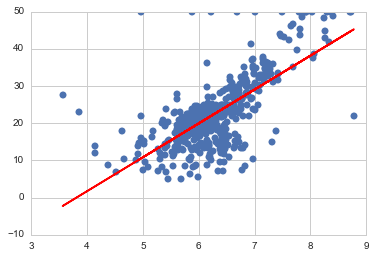

In [26]:
# Plot the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Plot the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [27]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print "The root mean squared error was %.2f " %rmse

The root mean squared error was 6.60 


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time.
Thus we can reasonably expect a house price to be within $13,200 of our line fit.

### Step 4: Using scikit learn to implement a multivariate regression

In [30]:
# Import Linear Regression from scikit learn
import sklearn
from sklearn.linear_model import LinearRegression

In [31]:
# Create a LinearRegression Object
lreg = LinearRegression()

In [32]:
# Data columns
X_multi = boston_df.drop('Price', 1)

# Targets
Y_target = boston_df.Price

In [35]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's go ahead check the intercept and number of coefficients.

In [38]:
print ' The estimated intercept coefficient is %.2f ' %lreg.intercept_

 The estimated intercept coefficient is 36.49 


In [40]:
print ' The number of coefficients used was %d ' % len(lreg.coef_)

 The number of coefficients used was 13 


In [43]:
print 'The coefficients are ', lreg.coef_

The coefficients are  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [44]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Just like we initially plotted out, it seems the highest correlation between a feature and a house price was the number of rooms.

### Step 5: Using Training and Validation datasets

In [45]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [49]:
# Print shapes of the training and testing data sets
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379L, 2L) (127L, 2L) (379L,) (127L,)


In [50]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [52]:
print "Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2)
    
print "Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 46.06
Fit a model X_train, and calculate MSE with X_test and Y_test: 37.88


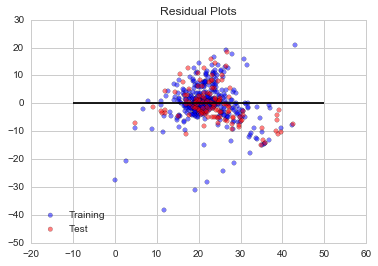

In [56]:
# Creating Residual plot
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

There aren't any major patterns to be concerned about.